In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import time
import tensorflow as tf

## Pre-setting

In [3]:
csv = pd.read_csv('lfd_2023_group2test.csv')
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    5000 non-null   int64  
 2   length_cm   5000 non-null   int64  
 3   wavelength  5000 non-null   int64  
 4   country     5000 non-null   object 
 5   cost        5000 non-null   int64  
 6   recoil      5000 non-null   float64
 7   y_offset    5000 non-null   float64
 8   shape       5000 non-null   object 
 9   distance    5000 non-null   float64
 10  target      5000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 429.8+ KB


<Axes: >

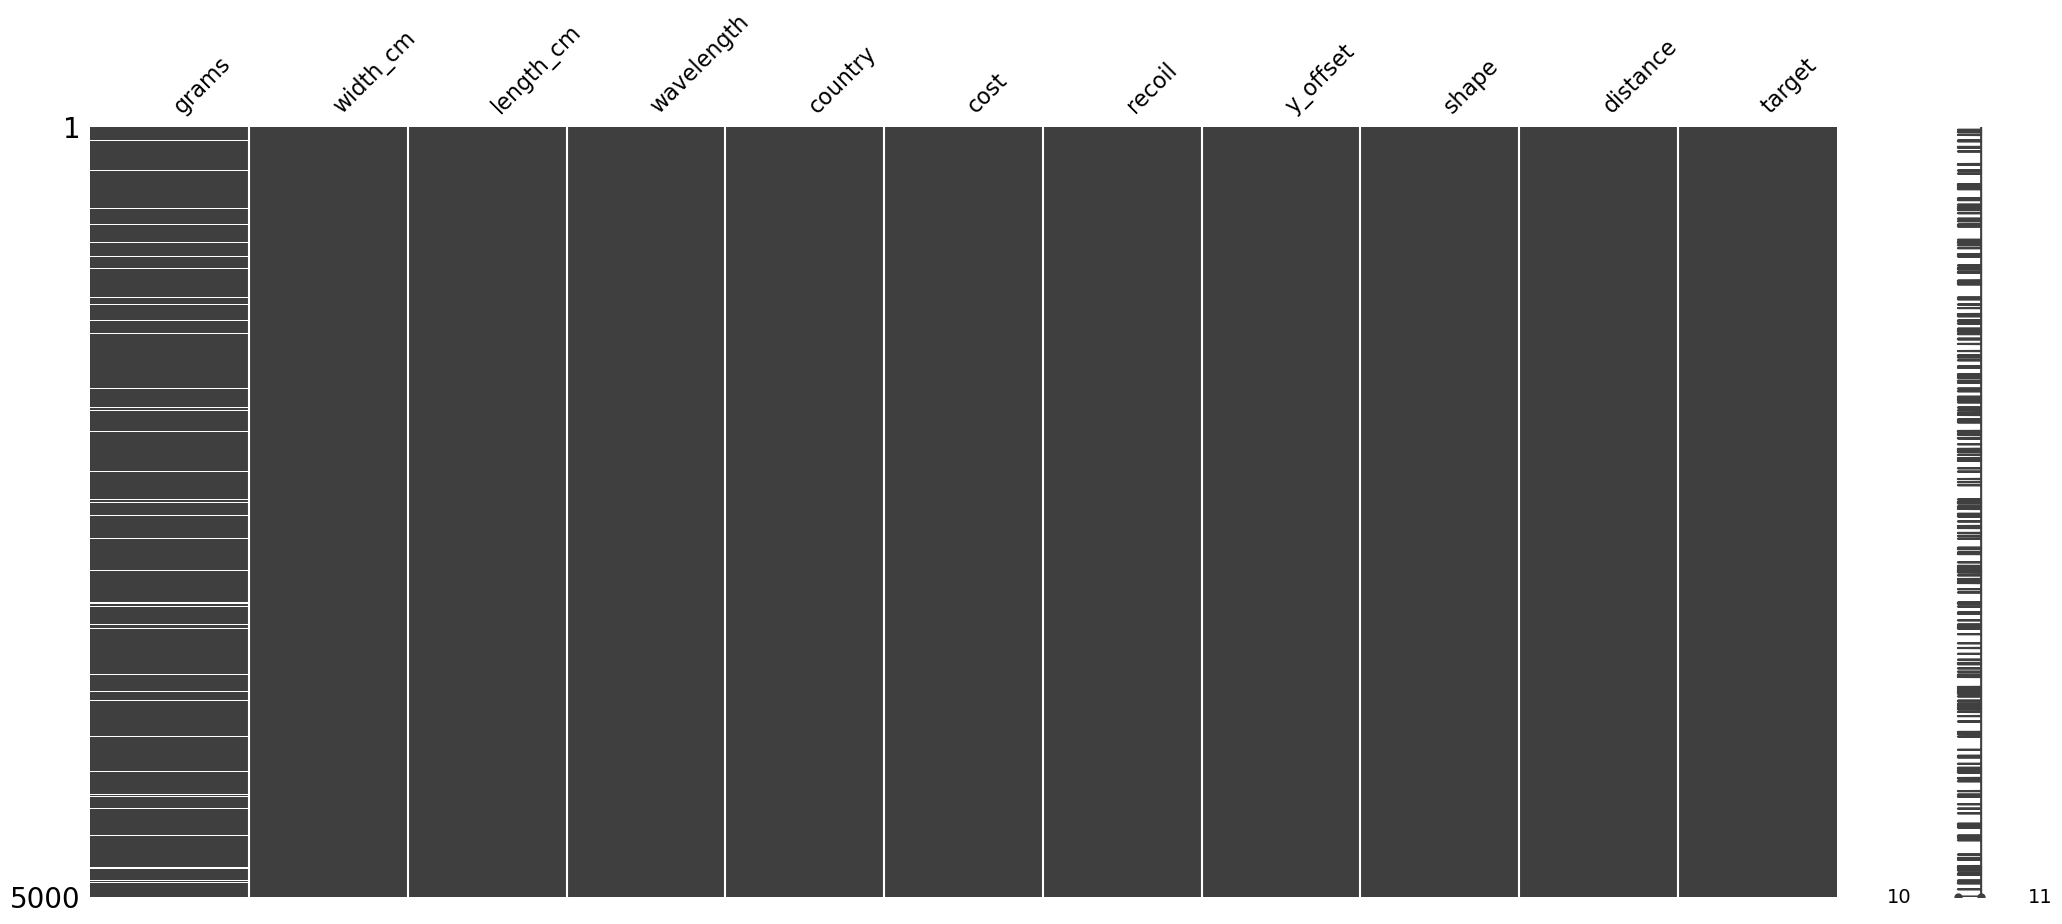

In [4]:
msno.matrix(csv.sample(5000))

<class 'pandas.core.frame.DataFrame'>
Index: 4751 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    4751 non-null   int64  
 2   length_cm   4751 non-null   int64  
 3   wavelength  4751 non-null   int64  
 4   country     4751 non-null   object 
 5   cost        4751 non-null   int64  
 6   recoil      4751 non-null   float64
 7   y_offset    4751 non-null   float64
 8   shape       4751 non-null   object 
 9   distance    4751 non-null   float64
 10  target      4751 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 445.4+ KB


<Axes: >

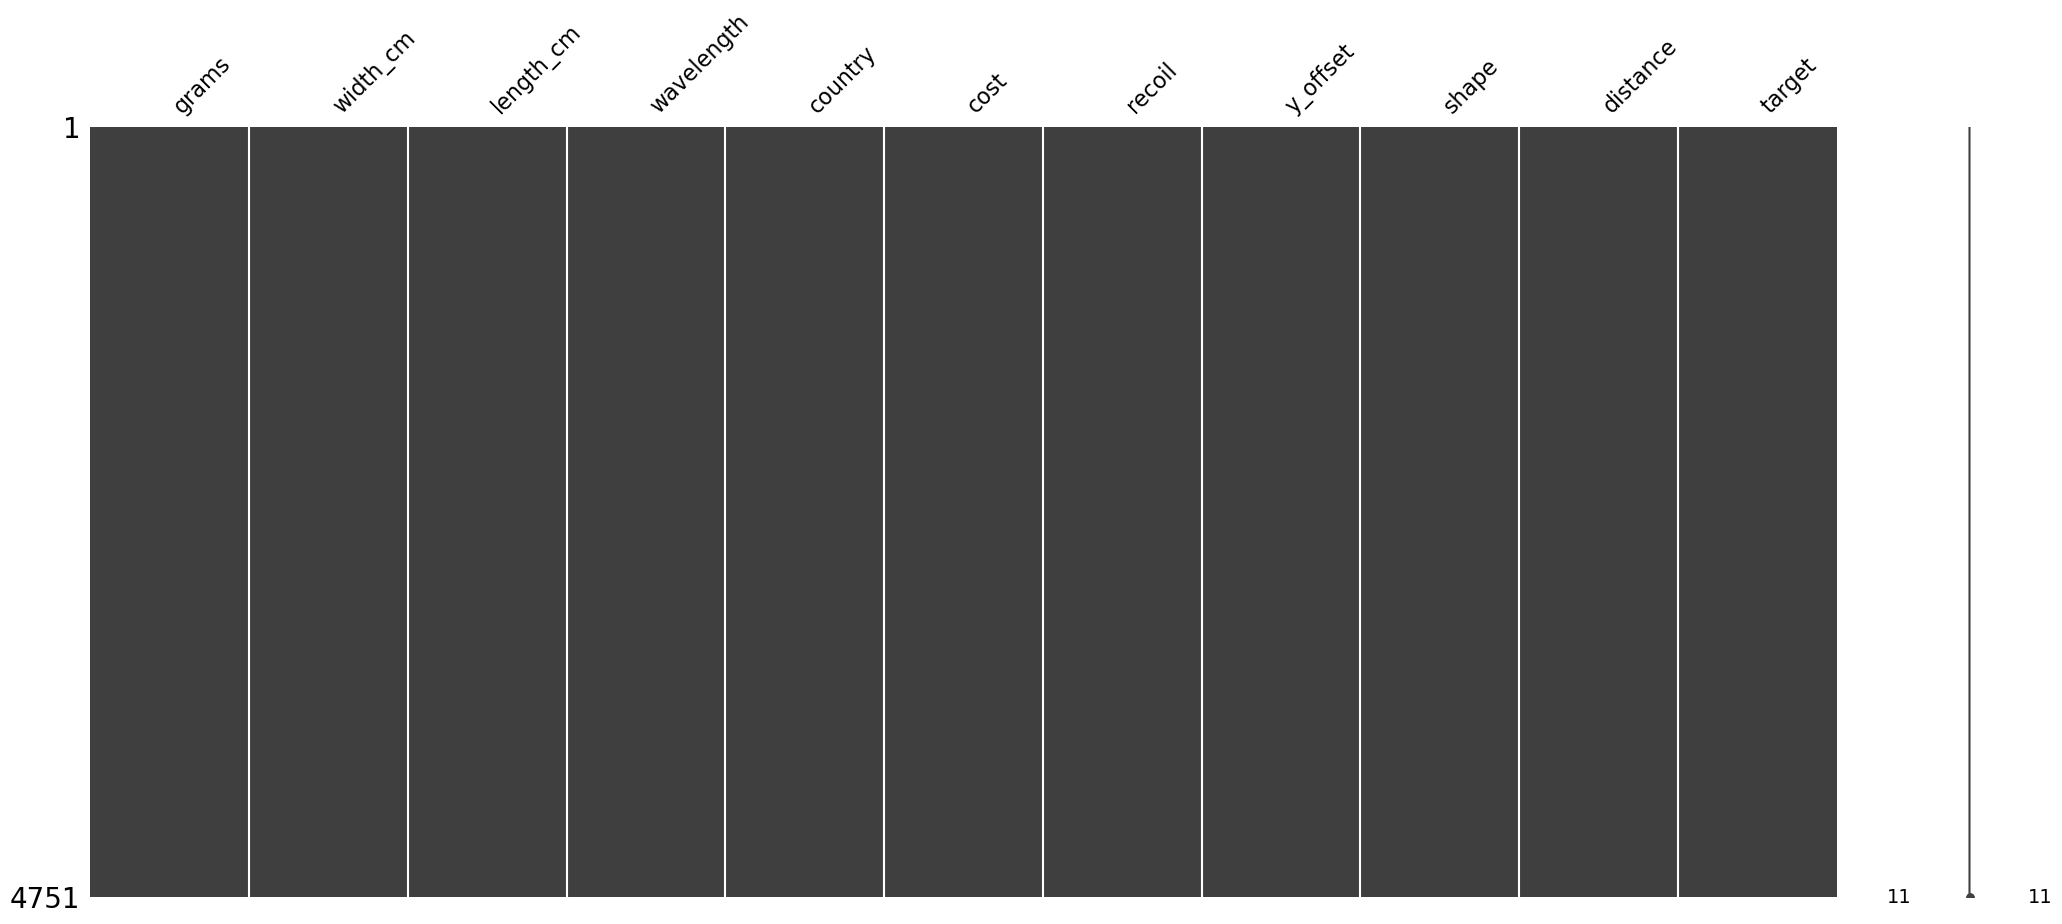

In [5]:
csv2 = csv.dropna()
csv3 = csv2.drop_duplicates()
csv3.info()
msno.matrix(csv3.sample(4751))

In [6]:
X = csv3.iloc[:, :-1].values
y = csv3.iloc[:, -1].values

In [7]:
y

array(['widget7', 'widget1', 'widget5', ..., 'widget4', 'widget2',
       'widget8'], dtype=object)

In [8]:
ct = ColumnTransformer(transformers=[
    ('encoder_4', OneHotEncoder(), [4]),
    ('encoder_8', OneHotEncoder(), [8])
], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, ..., 19.7, 28.7, 48.41],
       [0.0, 0.0, 0.0, ..., 43.28, -27.19, 39.84],
       [0.0, 0.0, 0.0, ..., 60.54, -72.91, 47.33],
       ...,
       [1.0, 0.0, 0.0, ..., 62.07, 14.78, 34.24],
       [0.0, 0.0, 0.0, ..., 28.24, -102.8, 43.03],
       [0.0, 1.0, 0.0, ..., 73.94, -50.94, 49.93]], dtype=object)

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([6, 0, 4, ..., 3, 1, 7])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
X_train

array([[0.0, 0.0, 1.0, ..., 24.09, 20.39, 42.91],
       [0.0, 0.0, 0.0, ..., 52.39, -20.58, 31.67],
       [0.0, 1.0, 0.0, ..., 75.19, 2.58, 48.71],
       ...,
       [1.0, 0.0, 0.0, ..., 62.84, -108.54, 35.36],
       [0.0, 0.0, 0.0, ..., 67.43, 68.0, 53.91],
       [0.0, 0.0, 0.0, ..., 70.82, -79.58, 52.01]], dtype=object)

In [12]:
X_test

array([[0.0, 0.0, 0.0, ..., 68.76, 45.44, 48.03],
       [0.0, 0.0, 0.0, ..., 25.98, -22.3, 36.48],
       [0.0, 0.0, 0.0, ..., 60.24, -4.77, 45.08],
       ...,
       [0.0, 0.0, 0.0, ..., 52.74, -71.7, 35.12],
       [0.0, 0.0, 0.0, ..., 24.01, -59.64, 45.23],
       [0.0, 0.0, 0.0, ..., 37.16, -127.63, 32.64]], dtype=object)

In [13]:
y_train

array([1, 3, 7, ..., 7, 8, 7])

In [14]:
y_test

array([7, 0, 7, 0, 4, 6, 8, 8, 8, 1, 0, 6, 2, 1, 7, 2, 8, 8, 2, 1, 5, 2,
       2, 6, 6, 1, 5, 6, 8, 0, 6, 3, 4, 2, 1, 3, 2, 6, 6, 6, 6, 8, 3, 4,
       0, 8, 3, 2, 2, 0, 8, 4, 5, 3, 8, 3, 6, 6, 5, 6, 6, 6, 2, 3, 7, 3,
       6, 6, 3, 4, 5, 2, 6, 5, 3, 0, 1, 8, 0, 6, 7, 3, 0, 4, 2, 1, 2, 6,
       1, 4, 2, 5, 8, 2, 5, 0, 8, 1, 0, 2, 6, 7, 3, 8, 6, 8, 5, 6, 8, 7,
       1, 0, 1, 2, 4, 8, 2, 8, 0, 2, 2, 1, 8, 7, 2, 5, 4, 3, 6, 1, 3, 0,
       3, 1, 8, 8, 8, 2, 3, 7, 2, 4, 2, 3, 5, 2, 3, 1, 6, 7, 6, 5, 3, 7,
       3, 0, 3, 8, 5, 5, 4, 2, 5, 2, 6, 8, 5, 8, 3, 4, 5, 2, 1, 2, 7, 6,
       0, 0, 0, 2, 7, 0, 7, 5, 4, 8, 2, 7, 5, 0, 0, 8, 8, 2, 3, 3, 5, 2,
       0, 8, 7, 2, 7, 8, 6, 0, 8, 4, 4, 5, 2, 3, 8, 8, 4, 7, 4, 0, 6, 0,
       1, 6, 1, 3, 3, 2, 1, 8, 2, 5, 7, 3, 1, 8, 7, 5, 7, 1, 1, 0, 5, 0,
       5, 0, 4, 4, 6, 5, 6, 5, 8, 3, 8, 8, 4, 6, 5, 2, 2, 3, 2, 7, 0, 7,
       5, 2, 5, 4, 2, 7, 3, 6, 1, 3, 6, 7, 1, 2, 2, 6, 7, 4, 8, 1, 7, 5,
       1, 3, 7, 8, 1, 1, 6, 4, 2, 2, 2, 5, 8, 7, 1,

In [15]:
sc = StandardScaler()
X_train[:, 16:] = sc.fit_transform(X_train[:, 16:])
X_test[:, 16:] = sc.transform(X_test[:, 16:])

In [16]:
X_train

array([[0.0, 0.0, 1.0, ..., -1.3605606964284784, 0.44001644617005986,
        0.3396859375552734],
       [0.0, 0.0, 0.0, ..., 0.4570477288486637, -0.1330944689207881,
        -0.8376167093765304],
       [0.0, 1.0, 0.0, ..., 1.9214107004500358, 0.19088036128433855,
        0.9471908621286248],
       ...,
       [1.0, 0.0, 0.0, ..., 1.1282140908326261, -1.363527373274974,
        -0.45111788667382974],
       [0.0, 0.0, 0.0, ..., 1.4230134785365869, 1.1060113367601325,
        1.4918504496771459],
       [0.0, 0.0, 0.0, ..., 1.640741130893106, -0.9584189500132956,
        1.2928402157651862]], dtype=object)

In [17]:
X_test

array([[0.0, 0.0, 0.0, ..., 1.5084346518800003, 0.7904296368712007,
        0.8759661468338181],
       [0.0, 0.0, 0.0, ..., -1.2391727132562593, -0.1571547758272138,
        -0.33380659089414844],
       [0.0, 0.0, 0.0, ..., 0.9612253309131714, 0.08806451491094991,
        0.5669765731284065],
       ...,
       [0.0, 0.0, 0.0, ..., 0.4795269849916673, -0.8481891718606015,
        -0.4762560214837617],
       [0.0, 0.0, 0.0, ..., -1.3656988121183076, -0.6794872525050821,
        0.5826879073846137],
       [0.0, 0.0, 0.0, ..., -0.5211210456026042, -1.6305688028352445,
        -0.7360167478530563]], dtype=object)

## Kernel SVM (rbf)

In [18]:
rbf=[0.0756, 0.07814, 0.071, 0.076, 0.074]  #train time * 5
start_time = time.time()

model = SVC(kernel = 'rbf', random_state = 1, C=100, gamma = 0.0001)
model.fit(X_train, y_train)

rbf_time = time.time() - start_time

print('Training completed.   The train time of SVM rbf is: ' , rbf_time)

Training completed.   The train time of SVM rbf is:  0.07784605026245117


In [19]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


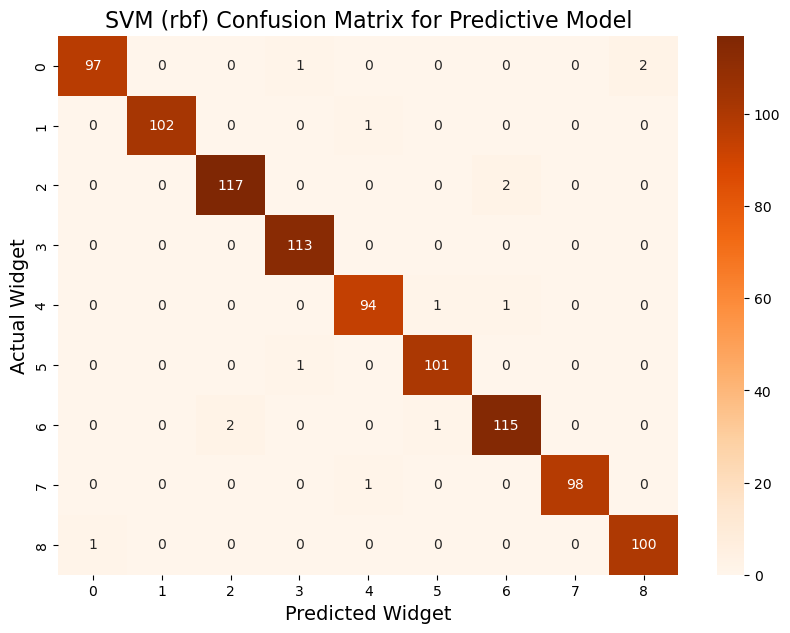

0.9852786540483701

In [20]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.title('SVM (rbf) Confusion Matrix for Predictive Model', fontsize=16)
plt.ylabel('Actual Widget', fontsize=14)
plt.xlabel('Predicted Widget', fontsize=14)
plt.show()

accuracy_score(y_test, y_pred)

In [33]:
rbf_gridtime=[20.101, 19.8311, 19.625, 19.8626, 19.806]

start_time = time.time()
model = SVC(kernel='rbf',random_state=1)

parameters = {
              'C': [0.1, 1, 100, 1000],
              'gamma': [0.0001, 0.001, 0.1, 1, 3, 5]
             }
gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
gridsearch.fit(X_train, y_train)

rbf_grid_time = time.time() - start_time

print("the grid time of RBF kernel is: ", rbf_gridtime)

the grid time of RBF kernel is:  [20.101, 19.8311, 19.625, 19.8626, 19.806]


In [22]:
gridsearch.best_params_

{'C': 100, 'gamma': 0.0001}

## Kernel SVM (Poly)

In [23]:
polytime=[0.0695, 0.0752, 0.0708, 0.069, 0.062]
start_time = time.time()

model = SVC(C=1, kernel='poly', random_state = 1)
model.fit(X_train, y_train)

poly_time = time.time() - start_time
print('Training completed.   The train time of SVM Poly is: ' , poly_time)

Training completed.   The train time of SVM Poly is:  0.06408071517944336


In [24]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


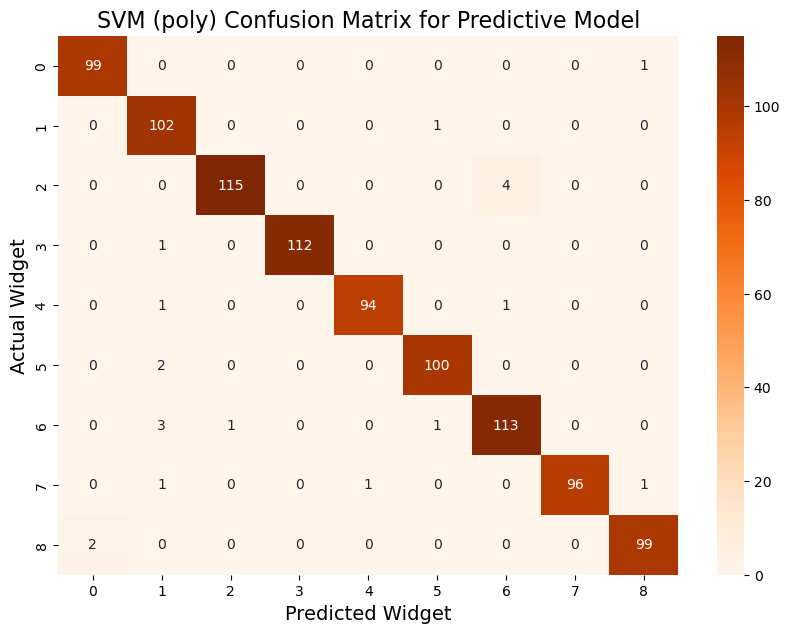

0.9779179810725552

In [25]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.title('SVM (poly) Confusion Matrix for Predictive Model', fontsize=16)
plt.ylabel('Actual Widget', fontsize=14)
plt.xlabel('Predicted Widget', fontsize=14)
plt.show()

accuracy_score(y_test, y_pred)


In [32]:
model = SVC(kernel='poly',random_state=1)

ir=range(1, 6)
polygridtime=[1.361783504486084, 1.3541688919067383, 1.3621025085449219, 1.3611788749694824, 1.3609387874603271]


for i in ir:
    start_time = time.time()
    parameters = {
                'C': [0.1, 1, 100, 1000],
                }
    gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
    gridsearch.fit(X_train, y_train)

    poly_grid_time = time.time() - start_time
    polygridtime.append(poly_grid_time)

print("and the grid time of poly kernel is:", poly_grid_time)

and the grid time of poly kernel is: 1.381664514541626


In [27]:
gridsearch.best_params_

{'C': 1}

## Kernel SVM (linear)

In [34]:
linear = []
ir=range(1, 6)
linear_store=[0.03, 0.029, 0.0289, 0.029, 0.0291]

for i in ir:
    start_time = time.time()
    model = SVC(C=0.1, kernel='linear', random_state = 1)
    model.fit(X_train, y_train)
    linear_time = time.time() - start_time
    linear.append(linear_time)

print('Training has done 5 times in a row.   All 5 train times of SVM linear is: ' , linear)


Training has done 5 times in a row.   All 5 train times of SVM linear is:  [0.03310441970825195, 0.04218721389770508, 0.032599687576293945, 0.03033900260925293, 0.033631086349487305]


In [35]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


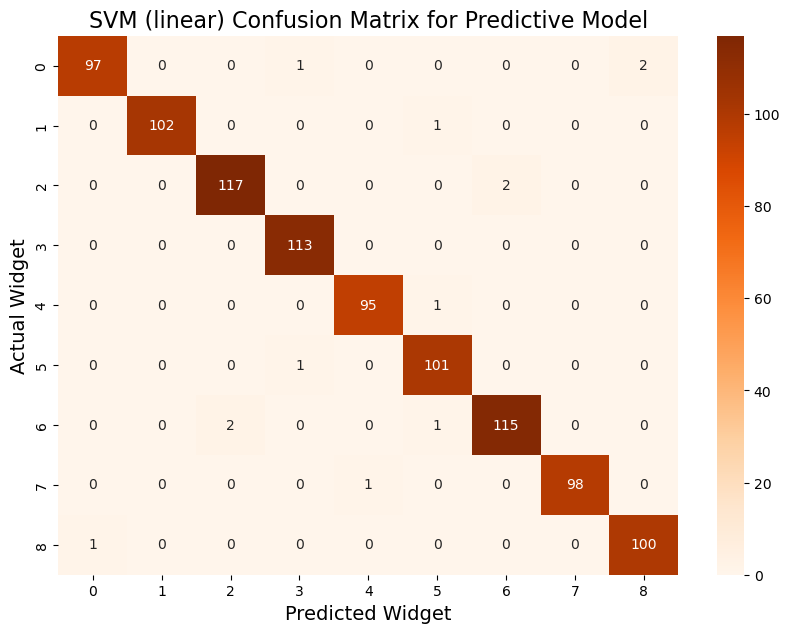

0.9863301787592008

In [36]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.title('SVM (linear) Confusion Matrix for Predictive Model', fontsize=16)
plt.ylabel('Actual Widget', fontsize=14)
plt.xlabel('Predicted Widget', fontsize=14)
plt.show()

accuracy_score(y_test, y_pred)

In [38]:
linear_grid=[]
ir=range(1, 6)
linear_grid_store=[0.9889, 1.0167, 1.0831, 1.0691, 1.0678]

model = SVC(kernel='linear',random_state=1)

for i in ir:
    start_time = time.time()

    parameters = {
                'C': [0.1, 1, 10, 100, 1000],
                }
    gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
    gridsearch.fit(X_train, y_train)
    linear_grid_time = time.time() - start_time
    linear_grid.append(linear_grid_time)

print("the grid time of linear kernel is: ", linear_grid_store)
    

the grid time of linear kernel is:  [0.9889, 1.0167, 1.0831, 1.0691, 1.0678]


In [39]:
gridsearch.best_params_

{'C': 0.1}

## Neural Network